# install Necessary Libraries

In [1]:
import pandas as pd
import datetime as dt
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import seaborn as sns
import scipy.stats
pd.options
import random

# Step 1&2 Historical Data Retrival and Cleaning

In [15]:
tickers = pd.read_excel(r"C:\Users\osamw\Documents\Quantitative Finance\Final-Project-Qetsiyah-Osamwonyi\spy500stocks.xlsx")
tickers=tickers["Name"].tolist()

data = yf.download(tickers,period='10y')

data = data.dropna(how='all',axis=1)

display(data)


[*********************100%***********************]  501 of 501 completed


Adj Close                                                 \
                     A        AAL         AAP        AAPL        ABBV   
Date                                                                    
2012-12-20         NaN        NaN         NaN         NaN         NaN   
2012-12-21   26.865763  12.670444   65.421577   15.950621         NaN   
2012-12-24   26.878845  12.566741   65.896416   15.976418         NaN   
2012-12-26   26.761038  12.472469   65.728813   15.756205         NaN   
2012-12-27   26.662634  12.349914   66.417770   15.819480         NaN   
...                ...        ...         ...         ...         ...   
2022-12-14  154.809998  13.350000  141.960007  143.210007  164.860001   
2022-12-15  150.860001  12.930000  143.229996  136.500000  163.100006   
2022-12-16  149.300003  12.810000  140.160004  134.509995  160.479996   
2022-12-19  146.949997  12.480000  140.899994  132.369995  161.490005   
2022-12-20  147.929993  12.530000  139.380005  132.300003  160.580002   

                                                                       ...  \
                   ABC        ABMD         ABT       ACGL         ACN  ...   
Date                                                                   ...   
2012-12-20         NaN         NaN         NaN        NaN         NaN  ...   
2012-12-21   37.318214   13.660000   26.223879  14.370000   56.158569  ...   
2012-12-24   37.164276   13.560000   25.993605  14.410000   55.758732  ...   
2012-12-26   36.873547   13.670000   25.830826  14.460000   55.217312  ...   
2012-12-27   36.967606   13.630000   25.826853  14.480000   55.159004  ...   
...                ...         ...         ...        ...         ...  ...   
2022-12-14  165.270004  380.109985  111.260002  60.320000  291.450012  ...   
2022-12-15  165.600006  380.160004  108.519997  60.750000  281.119995  ...   
2022-12-16  166.789993  381.000000  106.910004  61.029999  264.480011  ...   
2022-12-19  167.220001  381.299988  106.589996  60.540001  255.399994  ...   
2022-12-20  167.380005  380.790009  106.489998  62.240002  261.899994  ...   

               Volume                                               \
                 WYNN        XEL         XOM       XRAY        XYL   
Date                                                                 
2012-12-20        NaN        NaN         NaN        NaN        NaN   
2012-12-21  1078400.0  4453900.0  33057000.0  1464700.0  2001200.0   
2012-12-24   289500.0   928400.0   6385200.0   199100.0   286800.0   
2012-12-26   510500.0  1758300.0  10737800.0   499600.0   298600.0   
2012-12-27   865400.0  1774300.0  14258500.0   526800.0   392300.0   
...               ...        ...         ...        ...        ...   
2022-12-14  1690700.0  2551600.0  17597300.0  2730600.0   846700.0   
2022-12-15  2513400.0  3265700.0  15365100.0  2186500.0  1140100.0   
2022-12-16  2908300.0  6745300.0  54594800.0  4950300.0  1748300.0   
2022-12-19  3342700.0  2150300.0  13611100.0  1454300.0   900200.0   
2022-12-20  1548000.0  2208800.0  14677400.0  2248600.0   801800.0   

                                                                   
                   YUM        ZBH      ZBRA       ZION        ZTS  
Date                                                               
2012-12-20         NaN        NaN       NaN        NaN        NaN  
2012-12-21  16681846.0  1643880.0  738000.0  4336300.0        NaN  
2012-12-24   3749580.0   309000.0   63700.0   603900.0        NaN  
2012-12-26   4033205.0   614910.0  138200.0  1939800.0        NaN  
2012-12-27   4668196.0   687422.0  128800.0  2298800.0        NaN  
...                ...        ...       ...        ...        ...  
2022-12-14   1602600.0  1506500.0  393200.0  1065200.0  2182000.0  
2022-12-15   1981600.0  1694900.0  410400.0  1321800.0  1947400.0  
2022-12-16   4262700.0  2710600.0  769100.0  2646600.0  5216000.0  
2022-12-19   2325600.0   943400.0  325200.0  1052100.0  1833700.0  
2022-12-20   1211900.0  1038800.

### Store Returns and Volume data into Variables to use later

# Step 3: Momemtum Factors

### Class Creation named "Tools"

In [16]:
class Tools:
    def __init__(self, data, Tickers):
        self.price=data["Adj Close"]
        self.ret=self.price.pct_change()
        self.vol=data["Volume"]
        self.tckrs=Tickers
        
        
        self.mtbl= pd.DataFrame(index = self.tckrs)


    def bFactors(self):
        self.rMin = self.price.rolling(252).min()
        self.mtbl["Percent Above 252 day low"] = ((self.price - self.rMin) / self.rMin)[-20:].mean()

        self.mtbl["4/52 Price Oscillator"] = ((self.price.rolling(20).mean() - self.price.rolling(260).mean())/self.price.rolling(260).std())[-20:].mean()

        self.mtbl["39 Week Return"] = self.price.pct_change(189)[-20:].mean()

        self.mtbl["Price Volume"] = ((self.ret * self.vol).rolling(252).sum()[-20:].mean())

        self.mtbl["52 Week Trend"] = self.price.rolling(252).sum()[-20:].mean()

        return self.mtbl
    
    def agZS(self):
        self.mtbl = self.bFactors()
        self.scored = ((self.mtbl - self.mtbl.mean()) / self.mtbl.std()).sum(axis=1)
        return self.scored

    def baskets(self):
        self.z_scored = self.agZS()
        return self.z_scored.nlargest(10).index, self.z_scored.nsmallest(10).index

        

In [17]:
returns = data['Adj Close'].pct_change().resample("M").sum().shift(-1)

# Backtesting (5 Years)

In [18]:

duration = pd.DataFrame(pd.date_range("2017-12-21", dt.datetime.today(), freq="M"))
duration.rename(columns={0: "date"}, inplace=True)
lR, sR = pd.DataFrame(), pd.DataFrame()


for x in duration.date:
    MF = Tools(data[data.index <= x], tickers)
    longs, short = MF.baskets()

    lR = lR.append(returns[longs].loc[x])
    sR = sR.append(returns[short].loc[x])
    
     

lR.iloc[-1].dropna()

C:\Users\osamw\AppData\Local\Temp\ipykernel_16576\626778884.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lR = lR.append(returns[longs].loc[x])
C:\Users\osamw\AppData\Local\Temp\ipykernel_16576\626778884.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sR = sR.append(returns[short].loc[x])
C:\Users\osamw\AppData\Local\Temp\ipykernel_16576\626778884.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lR = lR.append(returns[longs].loc[x])
C:\Users\osamw\AppData\Local\Temp\ipykernel_16576\626778884.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sR = sR.append(returns[short].loc[x])
C:\Users\osamw\AppData\Local\Temp\ipyker

NVR     0.000808
ENPH   -0.050797
AZO    -0.077319
MRO    -0.116977
OXY    -0.104497
EQT    -0.154230
VLO    -0.087661
XOM    -0.041202
MPC    -0.071851
HES    -0.050936
Name: 2022-11-30 00:00:00, dtype: float64

### Comparison to SPY


### Setting date range

In [19]:
altbl = pd.DataFrame(lR.mean(axis=1) - sR.mean(axis=1)).shift()
altbl = altbl[-60:]

altbl['Return[Cumulative]'] = np.exp(np.log1p(altbl).cumsum())

altbl['Bench'] = yf.download('SPY', period = '6y')['Adj Close'].pct_change().resample('M').sum()

altbl['SPY [Cumulative]'] = np.exp(np.log1p(altbl['Bench']).cumsum())

altbl['Is it Positive?'] = altbl[0] > 0

altbl['cVs'] = altbl['Return[Cumulative]'] - altbl['SPY [Cumulative]']
altbl['is it [Cumul.] Positive?'] = altbl['cVs'] > 0

altbl.index = altbl.index.date
altbl=altbl.round(3)
altbl

[*********************100%***********************]  1 of 1 completed


,0,Return[Cumulative],Bench,SPY [Cumulative],Is it Positive?,cVs,is it [Cumul.] Positive?
2017-12-31,NaN,NaN,0.012,1.012,False,NaN,False
2018-01-31,0.017,1.017,0.055,1.068,True,-0.051,False
2018-02-28,0.167,1.186,-0.034,1.031,True,0.155,True
2018-03-31,-0.003,1.183,-0.026,1.005,False,0.178,True
2018-04-30,0.007,1.191,0.006,1.011,True,0.181,True
2018-05-31,0.058,1.261,0.024,1.036,True,0.225,True
2018-06-30,-0.044,1.205,0.006,1.042,False,0.163,True
2018-07-31,-0.081,1.107,0.037,1.080,False,0.027,True
2018-08-31,0.068,1.183,0.032,1.114,True,0.069,True
2018-09-30,0.043,1.234,0.006,1.121,True,0.113,True


# Charting Steps 7-9

### Monthly portfolio return bar chart (pos/neg coloring) vs SPY

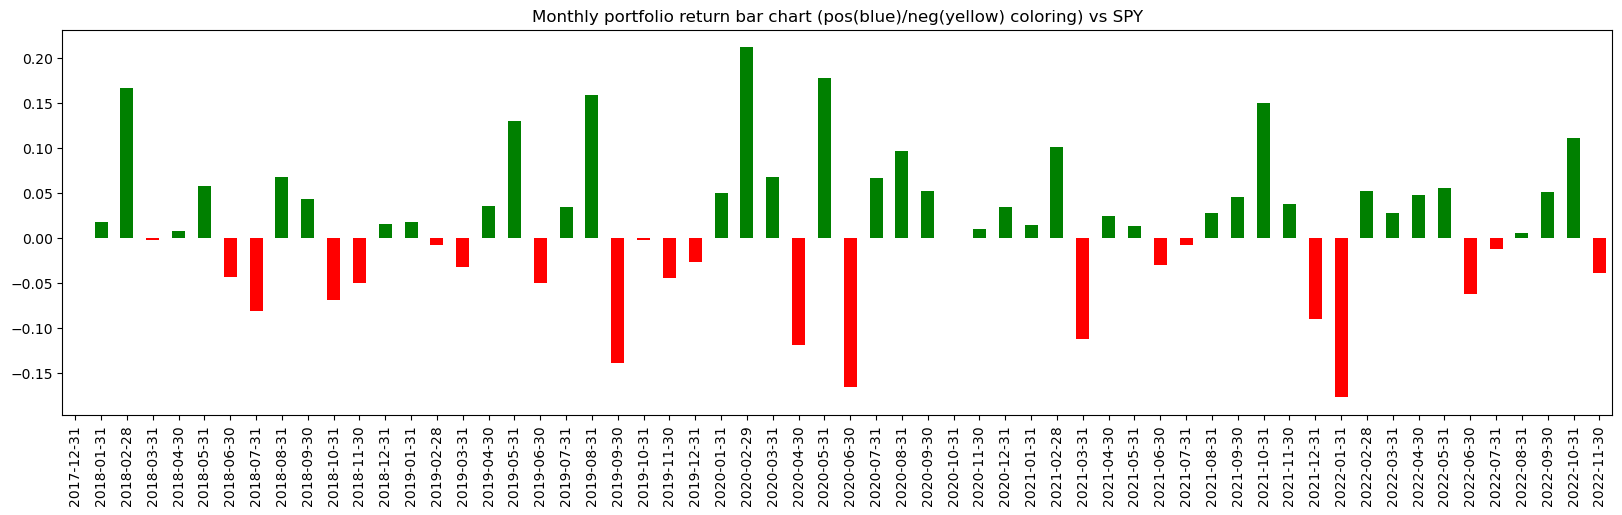

In [20]:
pt1, a1 = plt.subplots(figsize = (20,5))
a1 = altbl[0].plot(kind = 'bar', color = altbl['Is it Positive?'].map({True: 'g', False: 'r'}))
plt.title('Monthly portfolio return bar chart (pos(blue)/neg(yellow) coloring) vs SPY')
plt.show()


### Cumulative portfolio return vs SPY

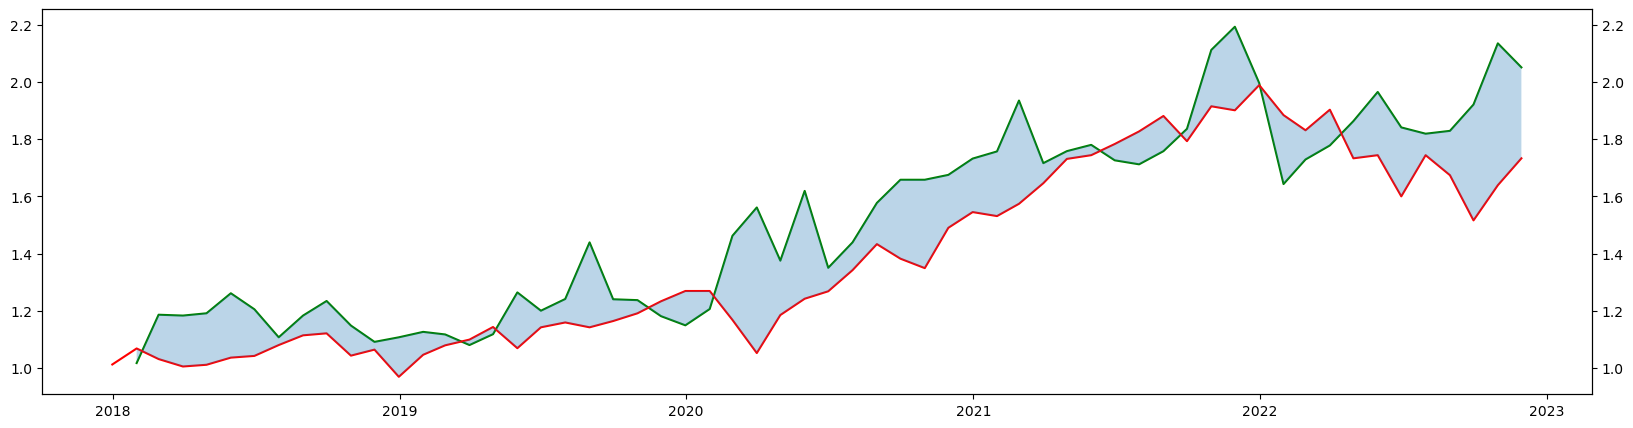

In [21]:
pt2, a2 = plt.subplots(figsize = (20, 5))
af = a2.twinx()
X = altbl.index
af.fill_between(X, altbl['Return[Cumulative]'], altbl['SPY [Cumulative]'], alpha = 0.30)
a2.plot(X, altbl['Return[Cumulative]'], color= 'green')
a2.plot(X, altbl['SPY [Cumulative]'], color= 'red')
plt.show()

### Monthly return for long picks vs short picks vs SPY

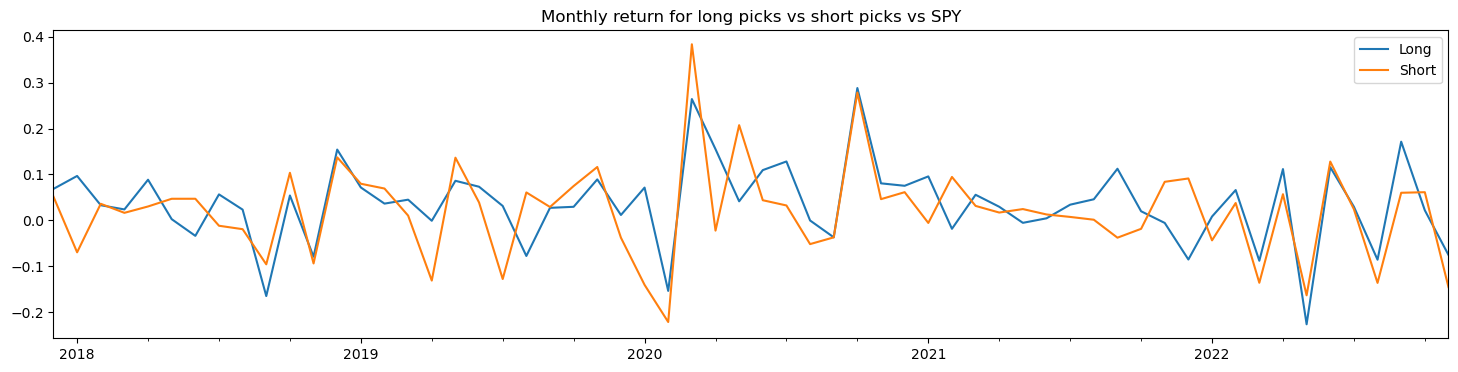

In [22]:
pt3 = plt.subplots(figsize=(18,4))
lR.mean(axis=1).plot(label = 'long')
sR.mean(axis=1).plot(label = 'short')
plt.legend(['Long', 'Short'])
plt.title('Monthly return for long picks vs short picks vs SPY')
plt.show()